# Trainingdata Sentiwordnet with stopword cleaning

In [8]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import matplotlib as mpl # to visualize data
import seaborn as sns # to visualize data
from sklearn.metrics import * # calculation of metrics for validation purposes 
import nltk # importing nltk            
from nltk.corpus import sentiwordnet as swn # importing sentiwordnet dictionary

setting to show full text content

In [9]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [10]:
df_sentiwordnet_with_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/testdata_with_stopwords_preprocessed.csv')

In [11]:
df_sentiwordnet_with_stopwords['target'].value_counts()

target
0    160000
4    160000
Name: count, dtype: int64

In [12]:
df_sentiwordnet_with_stopwords.head()

,Text,Ground_Truth_Label,target
0,would like to have even a little bit of time off work. Laying out until 11:30 then work 12:30-8:30.,negative,0
1,Looking forward to keeping in touch with Naomi.. It has been a long time since we chatted!,positive,4
2,"@NBATVAndre No, in Germany the NBA has no airtime . But I got the International LP so I will watch the game for sure.",negative,0
3,"@AliChemist Your future self's in trouble, then! My favourite Bagley is probably Running Blind, in Iceland. Terrific.",positive,4
4,@remco_dekker did you know there is a reason why Opera is only popular the mobile platform..? It's because Firefox rocks its ass!,positive,4


In [13]:
df_sentiwordnet_with_stopwords['Text'].apply(type).value_counts()

Text
<class 'str'>    320000
Name: count, dtype: int64

## Classifying sentiments 

This classifier uses only the most common meaning (lemma) of each word. For example, if the word "dog" appears, it is assumed to refer to the animal rather than being used as an insult. The sentiment score is determined based on this assumption.

In [14]:
def superNaiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            common_meaning = synsets[0]
            pos_score = common_meaning.pos_score()
            neg_score = common_meaning.neg_score()
            if pos_score > neg_score:
                weight += pos_score
            elif pos_score < neg_score:
                weight -= neg_score
        else:
            numExceptions += 1
        reviewPolarity += weight
    return reviewPolarity


In [15]:
df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_with_stopwords['Text'].apply(lambda x: 'positive' if superNaiveSentiment(x) >= 0 else 'negative')

In [16]:
df_sentiwordnet_with_stopwords.head()

,Text,Ground_Truth_Label,target,Sentiwordnet_Classification
0,would like to have even a little bit of time off work. Laying out until 11:30 then work 12:30-8:30.,negative,0,negative
1,Looking forward to keeping in touch with Naomi.. It has been a long time since we chatted!,positive,4,positive
2,"@NBATVAndre No, in Germany the NBA has no airtime . But I got the International LP so I will watch the game for sure.",negative,0,positive
3,"@AliChemist Your future self's in trouble, then! My favourite Bagley is probably Running Blind, in Iceland. Terrific.",positive,4,positive
4,@remco_dekker did you know there is a reason why Opera is only popular the mobile platform..? It's because Firefox rocks its ass!,positive,4,positive


## Testing quality of the classifier on testing data

In [17]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.583375


In [18]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'],beta=beta, pos_label='positive')


In [19]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.58
Precision: 0.56
Recall: 0.83
F1 Score: 0.67
F-beta Score (beta=0.7071067811865475): 0.6246591443347438


In [20]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.66      0.34      0.45    160000
    positive       0.56      0.83      0.67    160000

    accuracy                           0.58    320000
   macro avg       0.61      0.58      0.56    320000
weighted avg       0.61      0.58      0.56    320000



creating heatmap to visualize false positives and false negatives

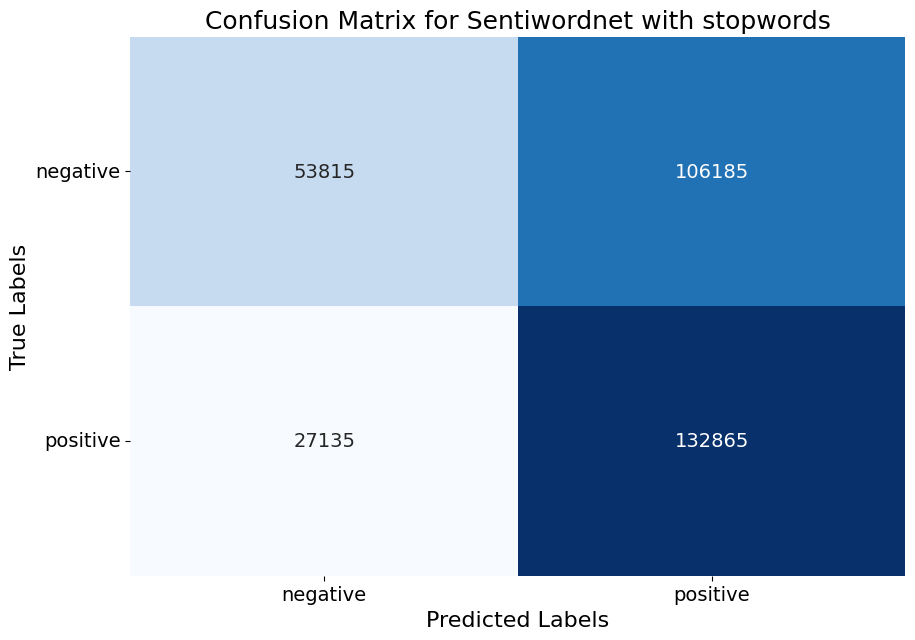

In [21]:
cm_nb = confusion_matrix(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()